# Samuel Chiang USCID: 7187956023

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# (b) Pre-processing data and Exploratory data analysis:

In [2]:
train_file = 'vertebral_column_data/column_2C.dat'
columns=["Pelvic Incidence", 'Pelvic Tilt','Lumbar Lordosis Angle', 
         'Sacral Slope', 'Pelvic Radius' ,'Degree Spondylolisthesis', 'Class']
variables = ["Pelvic Incidence", 'Pelvic Tilt','Lumbar Lordosis Angle', 'Sacral Slope', 'Pelvic Radius' ,'Degree Spondylolisthesis']
overall_train_error=[]
df = pd.read_csv(train_file, sep=" ", names=columns)
df

,Pelvic Incidence,Pelvic Tilt,Lumbar Lordosis Angle,Sacral Slope,Pelvic Radius,Degree Spondylolisthesis,Class
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB
5,40.25,13.92,25.12,26.33,130.33,2.23,AB
6,53.43,15.86,37.17,37.57,120.57,5.99,AB
7,45.37,10.76,29.04,34.61,117.27,-10.68,AB
8,43.79,13.53,42.69,30.26,125.00,13.29,AB
9,36.69,5.01,41.95,31.68,84.24,0.66,AB


## i. scatterplots of the independent variables in the dataset

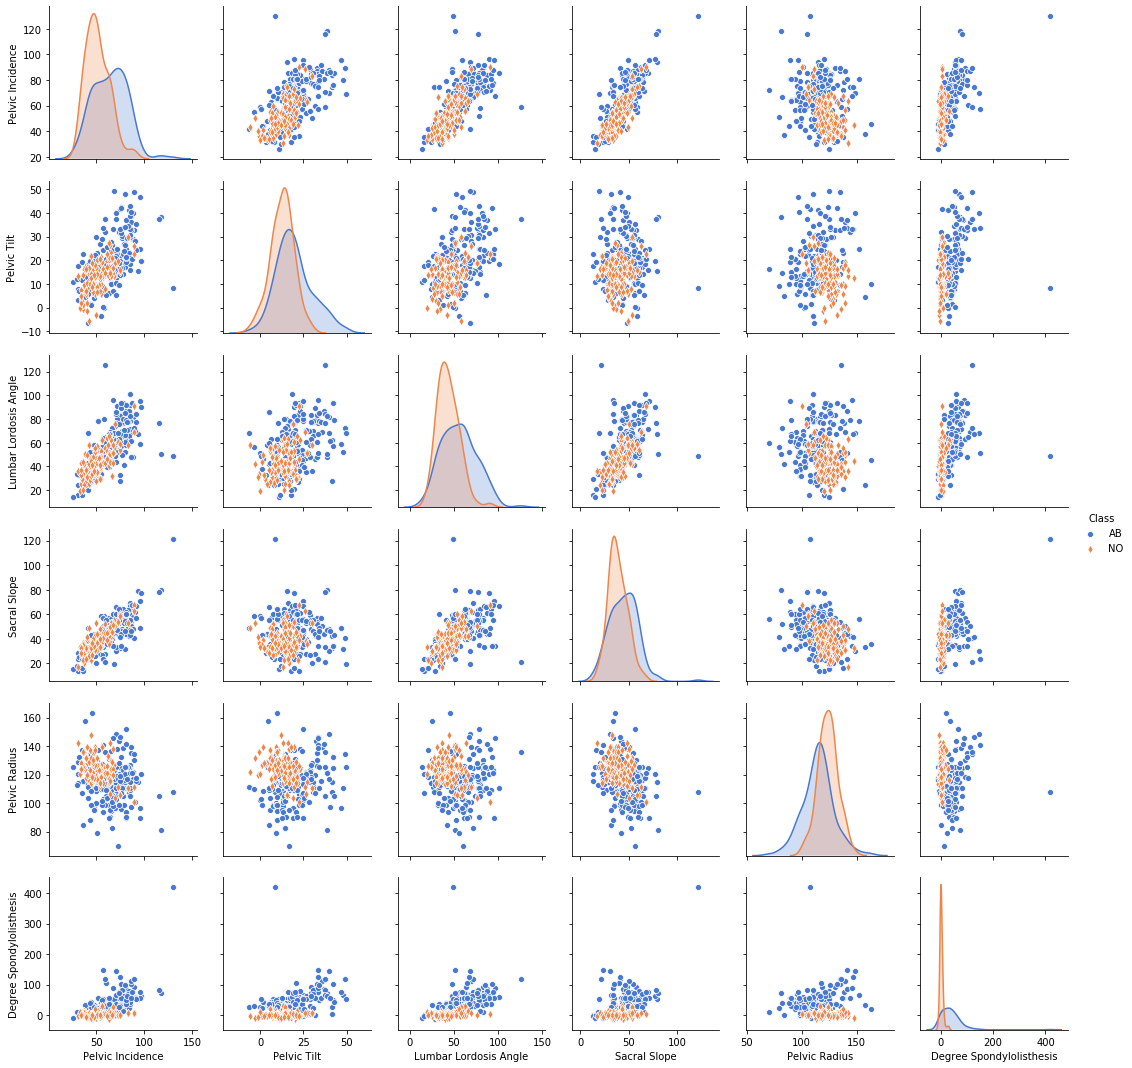

In [3]:
with sns.color_palette("muted"):
    sns.pairplot(df,x_vars=variables,y_vars=variables,hue='Class', markers=["o", "d"])

In [4]:
# fig,axe = plt.subplots(nrows=6,ncols=6,figsize=(25,25))
# color= ['red' if label == 'AB' else 'blue' for label in df.values[:,6]]
# names = ["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle","sacral_slope", "pelvic_radius", "grade_of_spondylolisthesis","class"]
# for i in range(6):
#     for j in range(6):
#         ax = axe[i,j]
#         if i == j:
#             ax.text(0.5, 0.5, names[i],horizontalalignment='center', verticalalignment='center',fontsize=11)
#         else:
#             ax.scatter(df.values[:,j],df.values[:,i],s=10,color=color)

## ii. Boxplots of the independent variables in the dataset

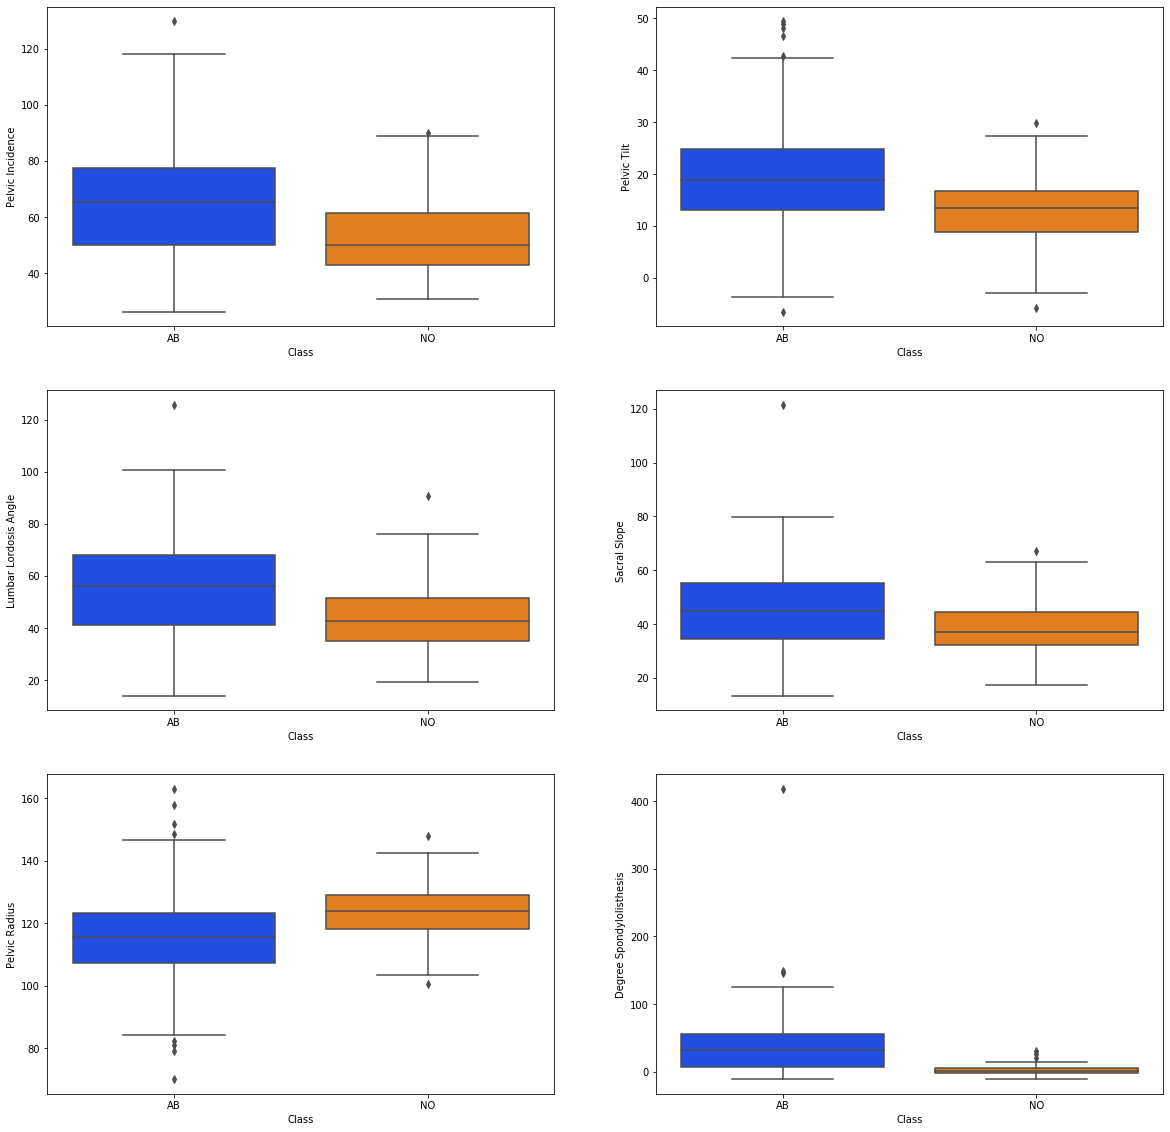

In [5]:
plt.figure(figsize=(20,20))
subplt=1
for i in range(len(variables)):
    with sns.color_palette("bright"):
        plt.subplot(3,2, subplt)
        sns.boxplot(x = "Class", y = variables[i], data = df)
        subplt += 1

## iii. Parsing the training data and testing data

In [6]:
df['Class Label'] = df.apply(lambda x: 0 if x['Class'] == 'NO' else 1, axis=1)
#df.pop('Class Label')
df.columns = ["Pelvic Incidence", 'Pelvic Tilt','Lumbar Lordosis Angle', 'Sacral Slope', 'Pelvic Radius' ,'Degree Spondylolisthesis', 'Classification', 'Class']
train_normal = df[df['Class'] == 0].iloc[0:70,:]
test_normal = df[df['Class'] == 0].iloc[70:,:]
train_abnormal = df[df['Class'] == 1].iloc[0:140,:]
test_abnormal = df[df['Class'] == 1].iloc[140:,:]

train_data = pd.concat([train_normal,train_abnormal], axis=0).reset_index(drop=True)
test_data = pd.concat([test_normal,test_abnormal], axis=0).reset_index(drop=True)

# (c) Classification using KNN on Vertebral Column Data Set

## i. Euclidean metric

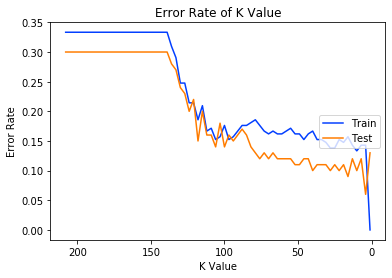

In [7]:
x_train = train_data.iloc[:,0:6]
y_train = train_data.Class
x_test = test_data.iloc[:,0:6]
y_test = test_data.Class

k_values = np.arange(208,-2,-3)
train_errors = []
test_errors = []
for k in k_values:
    knn = KNeighborsClassifier(k, metric = "euclidean")
    knn.fit(x_train, y_train)
    train_error = 1 - knn.score(x_train,y_train)
    test_error = 1 - knn.score(x_test,y_test)
    train_errors.append(train_error)
    test_errors.append(test_error)

with sns.color_palette("bright"):
    plt.title('Error Rate of K Value')
    plt.plot(k_values,train_errors,label = 'Train')
    plt.plot(k_values,test_errors,label = 'Test')
    plt.xlabel('K Value')
    plt.ylabel('Error Rate')
    plt.legend(loc='right')
    plt.gca().invert_xaxis()
overall_train_error.append(min(train_errors))

## ii. Euclidean Output Variables

In [8]:
optimal_k_index = test_errors.index(min(test_errors))
print('Most optimal k is %d with error of %s.'%(k_values[optimal_k_index], round(test_errors[optimal_k_index],3)))
knn = KNeighborsClassifier(n_neighbors=k_values[optimal_k_index], metric = "euclidean")
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

confuse_matrix = confusion_matrix(y_test, y_pred)
print('The confusion matrix is\n [%d, %d],\n [%d, %d]'
      %(confuse_matrix[0,0], confuse_matrix[0,1],confuse_matrix[1,0], confuse_matrix[1,1]))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
true_positive_rate = tp/(confuse_matrix[1,0] + confuse_matrix[1,1])
true_negative_rate = tn/(confuse_matrix[0,0] + confuse_matrix[0,1])
precison = tp/(confuse_matrix[0,1] + confuse_matrix[1,1])
f_score = (2*tp)/(2*tp+fp+fn)
print('True Postive Rate: %f \nTrue Negative Rate: %f \nPrecision: %f \nF Score: %f \n'
      %(true_positive_rate, true_negative_rate, precison, f_score))

Most optimal k is 4 with error of 0.06.
The confusion matrix is
 [25, 5],
 [1, 69]
True Postive Rate: 0.985714 
True Negative Rate: 0.833333 
Precision: 0.932432 
F Score: 0.958333 



## iii. Learning Curve

Text(0.5, 1.0, 'Learning Curve')

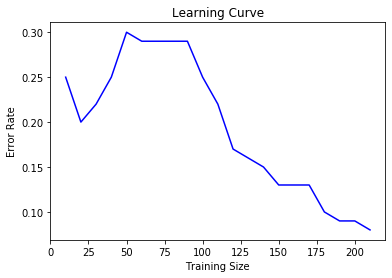

In [9]:
#plot best test error rate based on training set size
training_sizes = np.arange(10,220,10)
training_rate = []
test_rate = []
for size in training_sizes:
    train_normal = train_data[train_data['Class'] == 0].iloc[0:(size//3)]
    train_abnormal = train_data[train_data['Class'] == 1].iloc[0:(size-size//3)]

    temp_train_df = pd.concat([train_normal,train_abnormal], axis=0).reset_index(drop=True)
 
    x_train = temp_train_df.iloc[:,0:6]
    y_train = temp_train_df.Class
    x_test = test_data.iloc[:,0:6]
    y_test = test_data.Class

    train_errors=[]
    test_errors=[]
    k_values = np.arange(1,size+1,5)
    for k in k_values:
        knn = KNeighborsClassifier(k, metric = "euclidean")
        knn.fit(x_train,y_train)
        train_error = knn.score(x_train, y_train)
        test_error = knn.score(x_test, y_test)
        train_errors.append(train_error)
        test_errors.append(test_error)
    
    best_rate_index = test_errors.index(max(test_errors))    
    training_rate.append(1-train_errors[best_rate_index])
    test_rate.append(1-max(test_errors))

min_index = test_rate.index(min(test_rate))
    
plt.plot(training_sizes,test_rate, color='blue',label='Training Accuracy')
plt.xlabel('Training Size')
plt.ylabel('Error Rate')
plt.title('Learning Curve')

# (d) Other Metrics

## i. Manhattan Distance:

In [10]:
#(d) replace Euclidean with other metrics
k_values = np.arange(1,197,5)
train_errors = []
test_errors = []

for k in k_values:
    knn = KNeighborsClassifier(k, metric ='manhattan', p=1)
    knn.fit(x_train, y_train)
    train_error = 1 - knn.score(x_train, y_train)
    test_error = 1 - knn.score(x_test, y_test)
    train_errors.append(train_error)
    test_errors.append(test_error)

min_index = test_errors.index(min(test_errors)) 
manhattan_k = k_values[min_index]
manhattan_error= test_errors[min_index]
test_errors

[0.12,
 0.10999999999999999,
 0.10999999999999999,
 0.12,
 0.12,
 0.10999999999999999,
 0.12,
 0.13,
 0.13,
 0.13,
 0.14,
 0.13,
 0.15000000000000002,
 0.15000000000000002,
 0.14,
 0.14,
 0.16000000000000003,
 0.15000000000000002,
 0.19999999999999996,
 0.19999999999999996,
 0.21999999999999997,
 0.20999999999999996,
 0.22999999999999998,
 0.20999999999999996,
 0.21999999999999997,
 0.24,
 0.28,
 0.28,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004]

## ii. Minkowski Distance:

In [11]:
p_values = np.linspace(0.1,1,10)

train_errors = []
test_errors = []
for i in p_values:
    power = 10**i
    knn = KNeighborsClassifier(manhattan_k, p = power, metric ='minkowski')
    knn.fit(x_train, y_train)
    train_error = 1 - knn.score(x_train, y_train)
    test_error = 1 - knn.score(x_test, y_test)
    train_errors.append(train_error)
    test_errors.append(test_error)
    
min_index = test_errors.index(min(test_errors))
minkowski_k = k_values[min_index]
minkowski_error= test_errors[min_index]
test_errors

[0.08999999999999997,
 0.08999999999999997,
 0.07999999999999996,
 0.07999999999999996,
 0.07999999999999996,
 0.06000000000000005,
 0.06999999999999995,
 0.07999999999999996,
 0.08999999999999997,
 0.08999999999999997]

## iii. Chebyshev Distance:

In [12]:
train_errors = []
test_errors = []

for k in k_values:
    knn = KNeighborsClassifier(k, metric ='chebyshev')
    knn.fit(x_train,y_train)
    train_error = 1 - knn.score(x_train,y_train)
    test_error = 1 - knn.score(x_test,y_test)
    train_errors.append(train_error)
    test_errors.append(test_error)

min_index = test_errors.index(min(test_errors))
chebyshev_k = k_values[min_index]
chebyshev_error= test_errors[min_index]
test_errors

[0.13,
 0.09999999999999998,
 0.12,
 0.07999999999999996,
 0.10999999999999999,
 0.12,
 0.12,
 0.09999999999999998,
 0.13,
 0.12,
 0.12,
 0.12,
 0.14,
 0.13,
 0.14,
 0.10999999999999999,
 0.14,
 0.12,
 0.15000000000000002,
 0.14,
 0.18999999999999995,
 0.18000000000000005,
 0.18000000000000005,
 0.18000000000000005,
 0.20999999999999996,
 0.20999999999999996,
 0.25,
 0.28,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004]

## iiii. Mahalanobis Distance

In [13]:
train_errors = []
test_errors = []

for k in k_values:
    knn = KNeighborsClassifier(k, metric ='mahalanobis', metric_params={'V': np.cov(x_train,rowvar=False)})
    knn.fit(x_train, y_train)
    train_error = 1 - knn.score(x_train, y_train)
    test_error = 1 - knn.score(x_test, y_test)
    train_errors.append(train_error)
    test_errors.append(test_error)

min_index = test_errors.index(min(test_errors))
mahalanobis_k = k_values[min_index]
mahalanobis_error= test_errors[min_index]
test_errors

[0.17000000000000004,
 0.17000000000000004,
 0.19999999999999996,
 0.19999999999999996,
 0.20999999999999996,
 0.19999999999999996,
 0.22999999999999998,
 0.20999999999999996,
 0.24,
 0.24,
 0.24,
 0.26,
 0.25,
 0.27,
 0.26,
 0.25,
 0.24,
 0.26,
 0.26,
 0.26,
 0.28,
 0.29000000000000004,
 0.29000000000000004,
 0.29000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004]

## iiiii. Overall Output

In [14]:
overall_train_error.append(manhattan_error)
overall_train_error.append(minkowski_error)
overall_train_error.append(chebyshev_error)
overall_train_error.append(mahalanobis_error)
print('Manhattan: k-value=%d Error-Rate=%f' %(manhattan_k,manhattan_error))
print('Minkowski: k-value=%d Error-Rate=%f' %(minkowski_k,minkowski_error))
print('Chebyshev: k-value=%d Error-Rate=%f' %(chebyshev_k,chebyshev_error))
print('Mahalanobis: k-value=%d Error-Rate=%f' %(mahalanobis_k,mahalanobis_error))

Manhattan: k-value=6 Error-Rate=0.110000
Minkowski: k-value=26 Error-Rate=0.060000
Chebyshev: k-value=16 Error-Rate=0.080000
Mahalanobis: k-value=1 Error-Rate=0.170000


# (e) Weighted Decision

In [15]:
train_errors = []
test_errors = []
for k in k_values:
    k_nn = KNeighborsClassifier(k, weights='distance', metric='euclidean')
    k_nn.fit(x_train, y_train)
    train_error = 1 - k_nn.score(x_train, y_train)
    test_error = 1 - k_nn.score(x_test, y_test)
    train_errors.append(train_error)
    test_errors.append(test_error)
min_index = test_errors.index(min(test_errors))
weighted_euclidean_k = k_values[min_index]
weighted_euclidean_error= test_errors[min_index]

train_errors = []
test_errors = []
for k in k_values:
    k_nn = KNeighborsClassifier(k, weights='distance', metric='manhattan')
    k_nn.fit(x_train, y_train)
    train_error = 1 - k_nn.score(x_train, y_train)
    test_error = 1 - k_nn.score(x_test, y_test)
    train_errors.append(train_error)
    test_errors.append(test_error)
min_index = test_errors.index(min(test_errors))
weighted_manhattan_k = k_values[min_index]
weighted_manhattan_error= test_errors[min_index]

train_errors = []
test_errors = []
for k in k_values:
    k_nn = KNeighborsClassifier(k, weights='distance', metric='chebyshev')
    k_nn.fit(x_train, y_train)
    train_error = 1 - k_nn.score(x_train, y_train)
    test_error = 1 - k_nn.score(x_test, y_test)
    train_errors.append(train_error)
    test_errors.append(test_error)
min_index = test_errors.index(min(test_errors))
weighted_chebyshev_k = k_values[min_index]
weighted_chebyshev_error= test_errors[min_index]

overall_train_error.append(weighted_euclidean_error)
overall_train_error.append(weighted_manhattan_error)
overall_train_error.append(weighted_chebyshev_error)
print('Weighted Euclidean: k-value=%d Error-Rate=%f' %(weighted_euclidean_k,weighted_euclidean_error))
print('Weighted Manhattan: k-value=%d Error-Rate=%f' %(weighted_manhattan_k,weighted_manhattan_error))
print('Weighted Chebyshev: k-value=%d Error-Rate=%f' %(weighted_chebyshev_k,weighted_chebyshev_error))

Weighted Euclidean: k-value=6 Error-Rate=0.100000
Weighted Manhattan: k-value=26 Error-Rate=0.100000
Weighted Chebyshev: k-value=16 Error-Rate=0.110000


# (f) Overall Lowest Training Rate

In [16]:
print('Lowest training error rate was: %f' %(min(overall_train_error)))

Lowest training error rate was: 0.000000
